<a href="https://colab.research.google.com/github/Mohammedaslaan/DataScience-AIML-Practicals/blob/main/ML-Assgn2-EmailClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('/content/emails.csv')

In [193]:
df.shape

(5172, 3002)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [195]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [198]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [201]:
null_counts = df.isnull().sum()
null_counts
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [202]:
df.isnull().any().any()

False

In [204]:
df.shape

(5172, 3002)

In [206]:
x = df.drop(['Email No.','Prediction'],axis = 1)

In [208]:
x.shape

(5172, 3000)

In [209]:
y = df['Prediction']
y.shape

(5172,)

In [210]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state =45)

In [213]:
from ipykernel.kernelbase import kernel_protocol_version
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)


In [214]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [215]:
y_pred_knn = knn.predict(x_test)

In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_knn,y_test)

In [220]:
cm

array([[613,  15],
       [145, 262]])

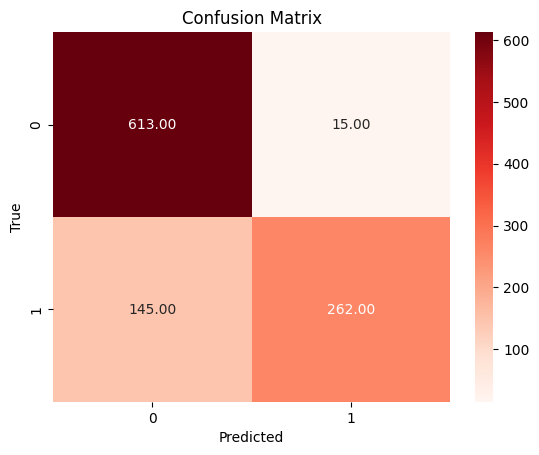

In [221]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [222]:
from sklearn.metrics import accuracy_score

In [223]:
accuracy_score(y_pred_knn, y_test)

0.8454106280193237

In [224]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state =0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [225]:
y_pred_svc = svc.predict(x_test)

In [226]:
cm = confusion_matrix(y_pred_svc, y_test)

In [227]:
cm

array([[725,  18],
       [ 33, 259]])

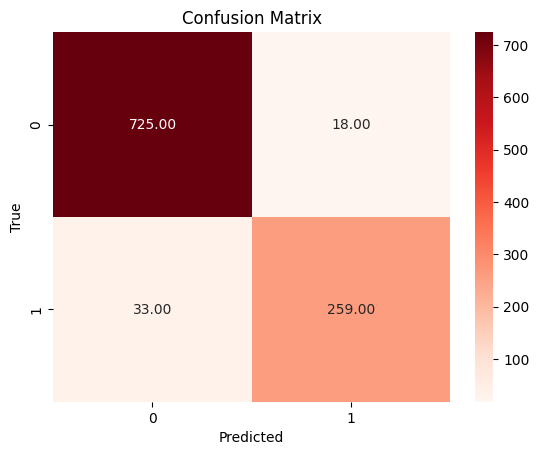

In [228]:
sns.heatmap(cm,annot=True, fmt = '0.2f', cmap ='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [230]:
accuracy_score(y_pred_svc, y_test)

0.9507246376811594